In [96]:
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans,SpectralClustering,DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import calmap
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [3]:
p = "pickles/alliance_sub.p"

In [4]:
df_merged = pd.read_pickle(p)

In [5]:
df_merged.head()

,Unnamed: 0,d,t,date_x,no2,o3,no,so2,temp,humidity,...,date_y,nsec,altm_(hpa),temp (degree_c),dew (degree_c),rh_(percentage),dir_(degrees),spd_(m/s),vis (km),clouds (====)
0,10936,06/05/2016,22:00:10,2016-05-07 00:00:00,7,-7,-22,41,16.64,85.37,...,2016-05-06 22:00:00,3671550000,1023.0,19,18,94,320,3,10.0,FEW018
1,10966,06/05/2016,22:30:10,2016-05-07 00:30:00,5,-5,-22,45,16.64,84.88,...,2016-05-06 22:30:00,3671551800,1023.0,19,17,88,350,2,10.0,FEW018
2,10996,06/05/2016,23:00:10,2016-05-07 01:00:00,2,-2,-23,45,16.70,84.57,...,2016-05-06 23:00:00,3671553600,1023.0,18,17,94,30,3,10.0,FEW018
3,11026,06/05/2016,23:30:10,2016-05-07 01:30:00,2,-2,-22,46,16.62,85.15,...,2016-05-06 23:30:00,3671555400,1024.0,18,17,94,10,3,10.0,FEW018
4,11082,07/05/2016,00:29:53,2016-05-07 02:29:00,0,0,-23,45,16.74,85.37,...,2016-05-07 00:30:00,3671559000,1024.0,18,17,94,20,2,10.0,FEW018


In [6]:
features = ['no2','o3','no','so2','temp', 'humidity', 'd0', 'd1', 'd2', 'd3', 'd4','d5', 'd6', 'd7',\
            'd8', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14', 'd15']

In [7]:
X = df_merged[features].as_matrix()

In [8]:
pca = PCA(n_components=2)

reduced_data = pca.fit_transform(X)

In [107]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit(reduced_data_k)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [108]:
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data_k[:, 0].min() - 1, reduced_data_k[:, 0].max() + 1


In [109]:
y_min, y_max = reduced_data_k[:, 1].min() - 1, reduced_data_k[:, 1].max() + 1

In [110]:
y_min,y_max,x_min, x_max

(-1.405326429455223,
 1.2191846834145117,
 -1.0989163589545143,
 1.2397801351506741)

In [111]:

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.03     # point in the mesh [x_min, x_max]x[y_min, y_max].
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [112]:
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])


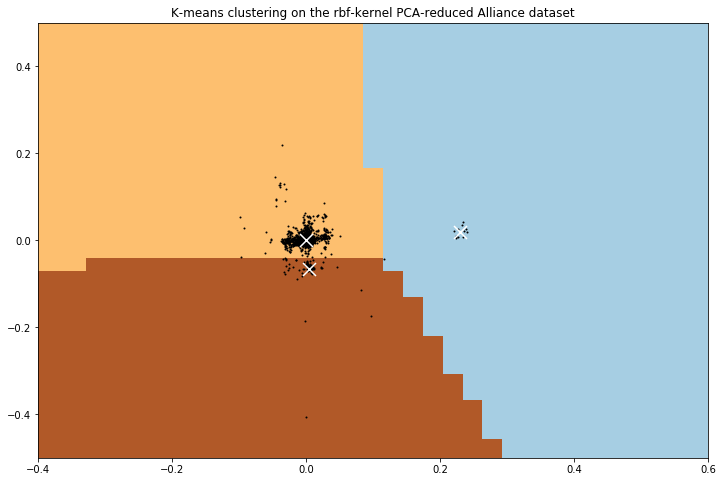

In [121]:

Z = Z.reshape(xx.shape)
plt.figure(1,figsize=(12,8))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data_k[:, 0], reduced_data_k[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the rbf-kernel PCA-reduced Alliance dataset')
plt.xlim(-0.4, 0.6)
plt.ylim(-0.5, 0.5)
#plt.xticks(())
#plt.yticks(())
plt.show()

In [136]:
db = DBSCAN(eps=0.1, min_samples=10).fit(reduced_data_k)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)


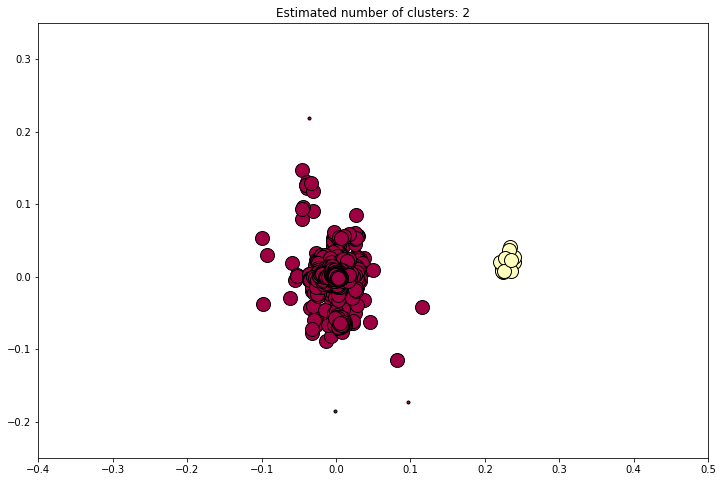

In [138]:
# Black removed and is used for noise instead.
plt.figure(1,figsize=(12,8))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    
    xy = reduced_data_k[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=3)

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    

    xy = reduced_data_k[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)


plt.xlim(-0.4, 0.5)
plt.ylim(-0.25, 0.35)
plt.title('DBSCAN Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [98]:
pca = KernelPCA(n_components=2, kernel='rbf')
reduced_data_k = pca.fit_transform(X)